In [1]:
import argparse
import cv2
import imutils
import numpy as np
import os

#Set the path for the image to be opened
path = r'C:\Users\lucag\Desktop\Images\1.jpg'
#Open the image
image = cv2.imread(path)

#Get image dimensions
(h, w, d) = image.shape # getting image dimensions (height, width, depth, a.k.a. channels)
print("width={}, height={}, depth={}".format(w, h, d))

#Get the three channel values for a single pixel
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

#Resize the image keeping the aspect ratio
new_width = 100.0
r = new_width / w
dim = (int(new_width), int(h * r))
resized = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized)

#OR, with imutils
resized = imutils.resize(image, width=300)
cv2.imshow("Imutils Resize", resized)

#Blur the image to reduce noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", blurred)

#Draw a rectangle
output = image.copy()
tl_vertex = (20, 160)
br_vertex = (40, 60)
bl_vertex = (tl_vertex[0], br_vertex[1])
tr_vertex = (br_vertex[0], tl_vertex[1])

cv2.rectangle(output, tl_vertex, br_vertex, (0, 0, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)
cv2.imshow("Rectangle", output)

#convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

GR = gray[100, 50]

integral = np.sum(gray[bl_vertex[1]:tl_vertex[1], bl_vertex[0]:br_vertex[0]]) #y1:y2, x1:x2
print("GR={}".format(GR))
print("Integral={}".format(integral))

cv2.imshow("image", image)
cv2.waitKey(0)

width=743, height=594, depth=3
R=24, G=21, B=16
GR=21
Integral=34368


-1

GR=21
Integral=[1017618]
Image shape: height -> 594 and width -> 743
Dragged rectangle coordinates
Top left vertex: (439,435), Bottom left vertex: (439,337), Top right vertex: (726,435), Bottom right vertex: (726,337)
GR=21
Integral=[1017618, 2107077]
Image shape: height -> 586 and width -> 730
Dragged rectangle coordinates
Top left vertex: (439,435), Bottom left vertex: (439,337), Top right vertex: (726,435), Bottom right vertex: (726,337)
GR=21
Integral=[1017618, 2107077, 1116630]
Image shape: height -> 565 and width -> 727
Dragged rectangle coordinates
Top left vertex: (439,435), Bottom left vertex: (439,337), Top right vertex: (726,435), Bottom right vertex: (726,337)


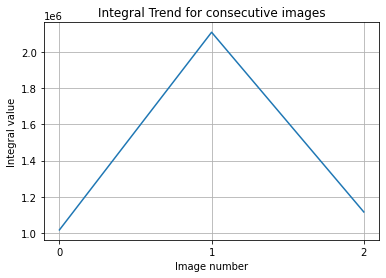

<Figure size 432x288 with 0 Axes>

In [11]:
import sys
import os
import argparse
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
username = 'PC' # 'admin' for BO1 lab
sys.path.append('c:/users/'+ username +'/miniconda3/lib/site-packages')
path_to_selectinwindow = './MyCustomPackage/opencvdragrect-master' # relative path to the MyCustomPackage folder 
sys.path.append(path_to_selectinwindow)
import selectinwindow

# Initialize the  drag object
wName = "select region"
# height, width, number of channels in image
imageHeight = gray.shape[0]
imageWidth = gray.shape[1]

# Define the drag object
rectI = selectinwindow.DragRectangle(gray, wName, imageWidth, imageHeight)

cv2.namedWindow(rectI.wname)
cv2.setMouseCallback(rectI.wname, selectinwindow.dragrect, rectI)

# keep looping until rectangle finalized
while True:
    # display the image
    cv2.imshow(wName, rectI.image)
    key = cv2.waitKey(1) & 0xFF

    # if returnflag is True, break from the loop
    if rectI.returnflag:
        break

#Set the directory containing the images to be opened
directory = r'C:\Users\lucag\Desktop\Images'

integral = []

# Sequentially open each image -------------------------------------

for i in os.listdir(directory): 
    
    image = cv2.imread(directory + "/" + i)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Computing the sum of pixel values inside the selected rectangle
    
    # INTEGRAL DOVREBBE ESSERE UN ARRAY DI ARRAY, PER ORA FACCIAMO UN ARRAY E BASTA
    
    integral.append(np.sum(gray[rectI.outRect.y:(rectI.outRect.y+rectI.outRect.h) , rectI.outRect.x:(rectI.outRect.w+rectI.outRect.x)])) #y1:y2, x1:x2 
    print("GR={}".format(GR))
    print("Integral={}".format(integral))
    print("Image shape: height -> " + str(gray.shape[0]) + " and width -> " + str(gray.shape[1]))

    #Draw a rectangle #CONTROLLA SE IL PRIMO PUNTO è IL VERTICE SINISTRO SUPERIORE O INFERIORE (IF COORD Y DEL PRIMO PUNTO >= DI COORD Y PUNTO FINALE O NO)
    output = gray.copy()
    tl_vertex = (rectI.outRect.x, rectI.outRect.y+rectI.outRect.h)
    br_vertex = (rectI.outRect.x+rectI.outRect.w, rectI.outRect.y)
    bl_vertex = (rectI.outRect.x, rectI.outRect.y)
    tr_vertex = (rectI.outRect.x+rectI.outRect.w, rectI.outRect.y+rectI.outRect.h)

    print("Dragged rectangle coordinates")
    print("Top left vertex: ({},{}), Bottom left vertex: ({},{}), Top right vertex: ({},{}), Bottom right vertex: ({},{})" \
          .format(tl_vertex[0],tl_vertex[1],bl_vertex[0],bl_vertex[1],tr_vertex[0],tr_vertex[1],br_vertex[0],br_vertex[1]))

    cv2.rectangle(output, tl_vertex, br_vertex, (0, 0, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)
    cv2.imshow("Rectangle", output)
    cv2.waitKey(0)  

# -----------------------------------------------------------    

    
#Plotting the integral ----------------------------

plt.figure("Integrals")
plt.plot(integral)
plt.xlabel('Image number')
plt.ylabel('Integral value')
plt.title('Integral Trend for consecutive images')
plt.grid(True)
plt.xticks(range(len(integral)))
plt.show()
plt.tight_layout()
#plt.savefig('../Figures/' + filename + '.png')

# -----------------------------------------------------------
        
'''       
# Computing the sum of pixel values inside the selected rectangle
integral = np.sum(gray[rectI.outRect.y:(rectI.outRect.y+rectI.outRect.h) , rectI.outRect.x:(rectI.outRect.w+rectI.outRect.x)])  #y1:y2, x1:x2
print("GR={}".format(GR))
print("Integral={}".format(integral))
print("Image shape: height -> " + str(gray.shape[0]) + " and width -> " + str(gray.shape[1]))

#Draw a rectangle #CONTROLLA SE IL PRIMO PUNTO è IL VERTICE SINISTRO SUPERIORE O INFERIORE (IF COORD Y DEL PRIMO PUNTO >= DI COORD Y PUNTO FINALE O NO)
output = gray.copy()
tl_vertex = (rectI.outRect.x, rectI.outRect.y+rectI.outRect.h)
br_vertex = (rectI.outRect.x+rectI.outRect.w, rectI.outRect.y)
bl_vertex = (rectI.outRect.x, rectI.outRect.y)
tr_vertex = (rectI.outRect.x+rectI.outRect.w, rectI.outRect.y+rectI.outRect.h)

print("Dragged rectangle coordinates")
print("Top left vertex: ({},{}), Bottom left vertex: ({},{}), Top right vertex: ({},{}), Bottom right vertex: ({},{})" \
      .format(tl_vertex[0],tl_vertex[1],bl_vertex[0],bl_vertex[1],tr_vertex[0],tr_vertex[1],br_vertex[0],br_vertex[1]))

cv2.rectangle(output, tl_vertex, br_vertex, (0, 0, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)
cv2.imshow("Rectangle", output)
cv2.waitKey(0) 
'''


# close all open windows
cv2.destroyAllWindows()

In [ ]:
import argparse
import cv2
import imutils
import numpy as np
import os

#Set the directory containing the images to be opened
directory =  "C:/Users/lucag/Desktop/Images" #r'C:\Users\lucag\Desktop\Images'

#Change to directory
#os.chdir(directory) 

# sequentially open each image
for i in os.listdir(directory):
    image = cv2.imread(directory + "/" + i)
    cv2.imshow("image", image)
    cv2.waitKey(0)    